In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle as pkl
import sys

from sklearn.linear_model import LinearRegression
import seaborn as sns

sys.path.append("..")
from analysis.cfreq.plot_cfreq_general import estimate_exponent

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

(-18.5, 3.5)

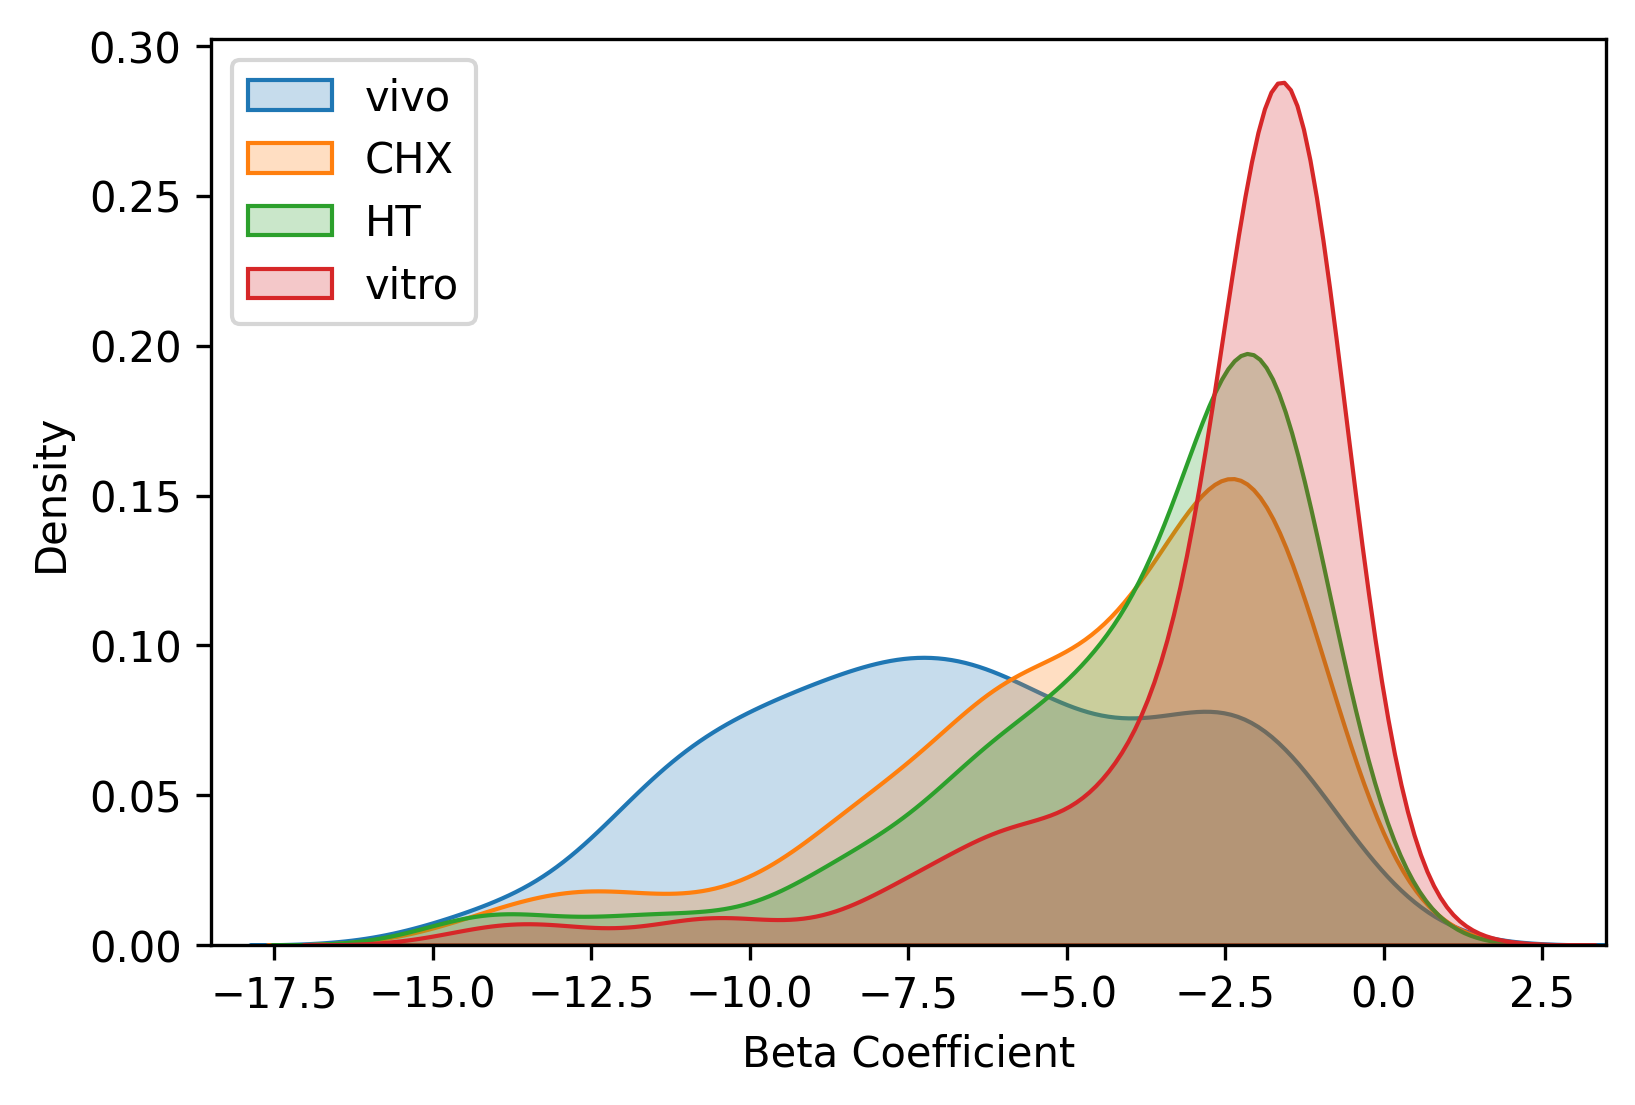

In [3]:
f_pickle = "../analysis/cfreq/G1_kethoxal-HepG2_translation_cfreq.pkl"
f_output_cfreq = None
f_output_hist = None
p_categories = [b'vivo', b'CHX', b'HT', b'vitro']
p_res = 25

plt.figure(dpi=300)

# pkl was written using python 2.7
# -- add encoding="bytes" for python 3 compatibility
with open(f_pickle, "rb") as f:
    data = pkl.load(f, encoding="bytes")

for i in p_categories:
    
    vivo = np.array(data[i])

    d_vivo = vivo / vivo.sum(axis=1)[:,np.newaxis]
    
    exp_vivo = estimate_exponent(d_vivo)
    
    sns.kdeplot(exp_vivo, shade=True, label=i.decode())

plt.legend(loc="upper left")
plt.xlabel("Beta Coefficient")
plt.ylabel("Density")

plt.xlim(-18.5, 3.5)